In [5]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(caret)
install.packages("e1071")

Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
ggsave(): ggplot2, cowplot
lag():    dplyr, stats

Attaching package: ‘testthat’

The following object is masked from ‘package:dplyr’:

    matches

The following object is masked from ‘package:purrr’:

    is_null

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [6]:
red_data <- read.csv("winequality-red.csv", sep = ";") 
head(red_data)
white_data <- read.csv("winequality-white.csv", sep = ";")
head(white_data)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


# Plotting data using BoxPlot

In [7]:
install.packages("cowplot")
library(cowplot)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


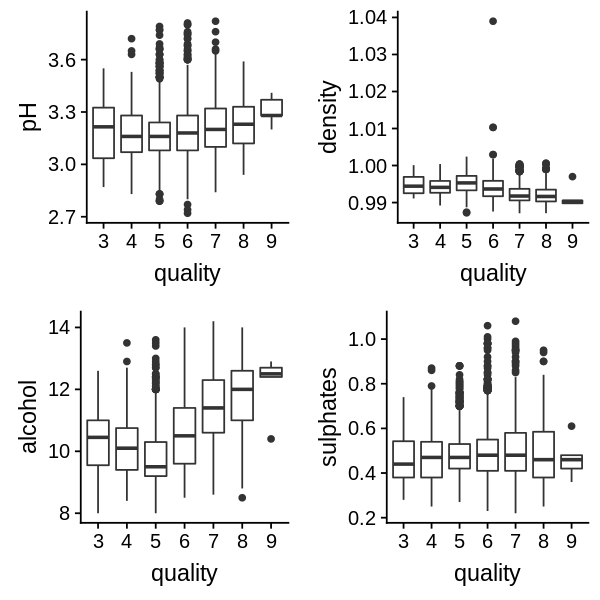

In [8]:
white_data_quality_factor <- white_data %>% mutate(quality = as.factor(quality))
options(repr.plot.width = 5, repr.plot.height = 5)
plot1<-white_data_quality_factor %>% 
    ggplot(aes(x=quality, y=pH)) +
    geom_boxplot()
plot2<-white_data_quality_factor %>% 
    ggplot(aes(x=quality, y=density)) +
    geom_boxplot()
plot3<-white_data_quality_factor %>% 
    ggplot(aes(x=quality, y=alcohol)) +
    geom_boxplot()
plot4<-white_data_quality_factor %>% 
    ggplot(aes(x=quality, y=sulphates)) +
    geom_boxplot()
plot_grid(plot1, plot2, plot3, plot4)

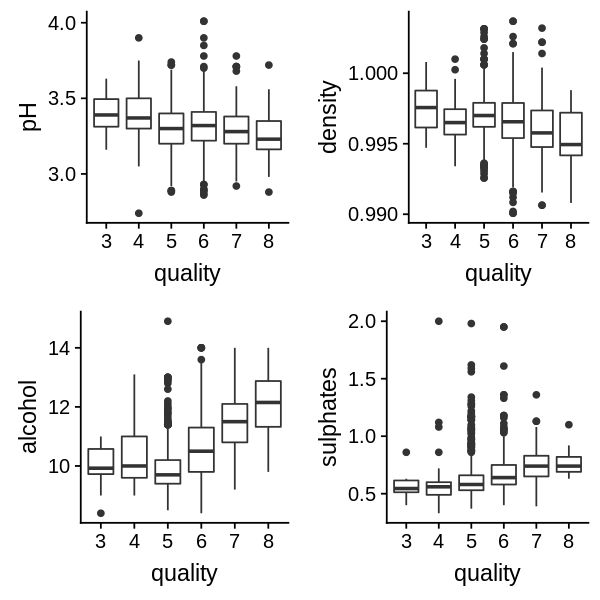

In [9]:
red_data_quality_factor <- red_data %>% mutate(quality = as.factor(quality))
options(repr.plot.width = 5, repr.plot.height = 5)
plot1<-red_data_quality_factor %>% 
    ggplot(aes(x=quality, y=pH)) +
    geom_boxplot()
plot2<-red_data_quality_factor %>% 
    ggplot(aes(x=quality, y=density)) +
    geom_boxplot()
plot3<-red_data_quality_factor %>% 
    ggplot(aes(x=quality, y=alcohol)) +
    geom_boxplot()
plot4<-red_data_quality_factor %>% 
    ggplot(aes(x=quality, y=sulphates)) +
    geom_boxplot()
plot_grid(plot1, plot2, plot3, plot4)

From the above plots, it seems that 
- sulphates may be a good indicator for quality. Though it has a pretty constant curve in the box plot, there are a number of outliers, which leads us to believe that this might be a factor in predicting quality.
- Alcohol seems to vary quite a bit between quality, thus indicating a good predictor.
- Density only seems to be a good predictor for Red Wine data, and not a very interesting one for White wine.
- pH has a similar plot as sulphates in the White wine data and a similar plot to density in the Red wine data, so it might be a worthwhile predictor in this scenario